<h1><center>Laboratorio 7: La desperación de Mr. Lepin 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angel Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1:Álvaro Gallardo
- Nombre de alumno 2:Maximiliano Westerhout


### **Link de repositorio de GitHub:** `https://github.com/MaxWesterhout/Lab-7-Programacion-Cientifica.git`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

# Temas a tratar

- Aplicar Pandas para obtener características de un DataFrame.
- Aplicar Pipelines.
- Aplicar Clusters sobre un conjunto de datos.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio

- Comprender y aprovechar las ventajas que nos ofrece la librería `pandas` con respecto a trabajar en Python 'puro'.
- Crear nuevas características para entrenar un modelo de clustering.
- Comprender como aplicar pipelines de Scikit-Learn para generar procesos más limpios.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [ ]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import datetime
from IPython.display import HTML

# Libreria para plotear (En colab esta desactualizado plotly)
!pip install --upgrade plotly
import plotly.express as px
import plotly.graph_objects as go

# Librerias utiles
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin, en una nueva reunión, le cuenta a ud y su equipo que los resultados derivados del análisis exploratorio de dato presentaron una gran utilidad para la empresa y que tiene un gran entusiasmo por continuar trabajando con ustedes.
Es por esto, que Mr. Lepin les pide que cargue y visualicen algunas de las filas que componen el Dataset.
A continuación un extracto de lo parlamentado en la reunión:

    - Usted: Es un gran logro para nuestro equipo que usted haya encontrado excelente el EDA. ¿Qué tiene en mente ahora?
    - Mr. Lepin: Resulta que hace algún tiempo, mientras tomaba un mojito en una reunión de gerentes en Panamá, oí a un *chato* acerca de **LRMFP**, que es un modelo que permite personificar a los clientes a través de la fabricación de distintos atributos que describen a los clientes. Lo encontré es-tu-pendo ñatito.
    - Usted: Ehh bueno. Investigaremos acerca de este modelo y veremos lo que podemos hacer.

Por ende, su siguiente tarea es calcular **LRMFP** sobre cada cliente y luego hacer un análisis de las características generadas. Para esto, el área de ventas les entrega un nuevo archivo llamado `online_retail_II_cleaned.pickle`, quien posee los datos del DataFrame original limpios y listos para obtener las características solicitadas por Mr. Lepin.

In [ ]:
df_retail = pd.read_pickle("online_retail_II_cleaned.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": "category",
        "Description": str,
        "Customer ID": "category",
        "Country": "category"
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df_retail.shape

(400947, 8)

## 1.2 Creación de nuevas Caracteristicas [2 Puntos]

Como ya se les comento, Mr. Lepin esta interesado en obtener las características **LRMFP**, para esto les señala que estas características se construyen en base a las siguientes definiciones:

- **Length (L)**: Intervalo de tiempo, en días, entre la primera y la última visita del cliente. Mientras mas grande sea el valor, mas fiel es el cliente.

- **Recency (R)**: Indica hace cuanto tiempo el cliente realizo su ultima compra. Notar que para este caso, mientras mas grande es el valor, menos interes posee el usuario para repetir una compra en uno de los locales.

- **Monetary (M)**: El término "monetario" se refiere a la cantidad media de dinero gastada por cada visita del cliente durante el período de observación y refleja la contribución del cliente a los ingresos de la empresa.

- **Frequency (F)**: Se refiere al número total de visitas del cliente durante el periodo de observación. Cuanto mayor sea la frecuencia, mayor será la fidelidad del cliente.

- **Periodicity (P)**: Representa si los clientes visitan las tiendas con regularidad.

$$Periodicity(n)=std(IVT_1, ..., IVT_n)$$

&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Donde $IVT$ denota el tiempo entre visitas y n representa el número de valores de tiempo entre visitas de un cliente.


$$IVT_i=date\_diff(t_{i+1},t)$$

En base a las definiciones señaladas, diseñe una función que permita obtener las características **LRMFP** recibiendo un DataFrame como entrada. Para esto, no estará permitido el uso de iteradores, utilice todas las herramientas que les ofrece `pandas` para realizar esto.

Una referencia que le puede ser útil es el [documento original](https://www.researchgate.net/publication/315979555_LRFMP_model_for_customer_segmentation_in_the_grocery_retail_industry_a_case_study) en donde se propone este método.

**<u>Formato</u> del Resultado Esperado:**

| Customer ID | Length | Recency | Frequency | Monetary | Periodicity |
|------------:|-------:|--------:|----------:|---------:|------------:|
|   12346.0   |    294 |      67 |        46 |   -64.68 |        37.0 |
|   12347.0   |     37 |       3 |        71 |  1323.32 |         0.0 |
|   12349.0   |    327 |      43 |       107 |  2646.99 |        78.0 |
|   12352.0   |     16 |      11 |        18 |   343.80 |         0.0 |
|   12356.0   |     44 |      16 |        84 |  3562.25 |        12.0 |

**Respuesta:**

In [ ]:
import pandas as pd

def custom_features(dataframe_in):
    # Agrupamos el DataFrame por Customer ID
    grouped = dataframe_in.groupby('Customer ID')

    # Calculamos Length (L)
    length = grouped['InvoiceDate'].agg(lambda x: (x.max() - x.min()).days)

    # Calculamos Recency (R)
    recency = grouped['InvoiceDate'].agg(lambda x: (dataframe_in['InvoiceDate'].max() - x.max()).days)

    # Calculamos Frequency (F)
    frequency = grouped.size()

    # Calculamos Monetary (M)
    monetary = grouped.apply(lambda group: (group['Price'] * group['Quantity']).mean())

    # Calculamos Periodicity (P)
    periodicity = grouped['InvoiceDate'].apply(lambda x: x.diff().std()).dt.days

    # Creamos un nuevo DataFrame con las características LRMFP
    lrmfp_df = pd.DataFrame({'Customer ID': length.index,
                             'Length': length.values,
                             'Recency': recency.values,
                             'Frequency': frequency.values,
                             'Monetary': monetary.values,
                             'Periodicity': periodicity.values})

    return lrmfp_df

**Resúesta de Pauta:**

In [ ]:
lrmfp_features = custom_features(df_retail)
lrmfp_features

,Customer ID,Length,Recency,Frequency,Monetary,Periodicity
0,12346.0,196,164,33,11.298788,21.0
1,12347.0,37,2,71,18.638310,4.0
2,12348.0,0,73,20,11.108000,0.0
3,12349.0,181,42,102,26.187647,16.0
4,12351.0,0,10,21,14.330000,0.0
...,...,...,...,...,...,...
4309,18283.0,275,17,217,2.854240,11.0
4310,18284.0,0,66,28,16.488571,0.0
4311,18285.0,0,295,12,35.583333,0.0
4312,18286.0,247,111,67,19.349701,30.0


In [ ]:
lrmfp_features.isnull().sum()

Customer ID      0
Length           0
Recency          0
Frequency        0
Monetary         0
Periodicity    148
dtype: int64

## 1.3 Pipelines 👷

Finalmente *Don Mora* le pregunta si seria posible realizar un pipeline para realizar una segmentación de los clientes con los nuevos datos generados, a lo que usted responde que **sí** y propone la utilización de k-means para la segmentación.

A continuación siga los pasos requeridos para obtener la segmentación de clientes.

### 1.3.1 Estandarizar Caracteristicas [0.5 puntos]

Construya una clase llamada ``MinMax()`` utilizando ``BaseEstimator`` y ``TransformerMixin`` para realizar una transformación de cada una de las columnas de un DataFrame utilizando ``ColumnTransformer()`` más tarde (tome como referencia el siguiente [enlace](https://sklearn-template.readthedocs.io/en/latest/user_guide.html#transformer)).


 Para esto considere que Min-Max escaler queda dada por la ecuación:

$$MinMax = \dfrac{x-min(x)}{max(x) - min(x)}$$

Con esto buscamos que los valores que componen a las columnas se muevan en el rango de valores $[0, 1]$.

**Respuesta:**

In [ ]:
class MinMax(BaseEstimator, TransformerMixin):
    def fit(self, X):
        self.min_vals = X.min()
        self.max_vals = X.max()
        return self

    def transform(self, X):
        # Aplicamos la transformación Min-Max a cada columna
        X_transformed = (X - self.min_vals) / (self.max_vals - self.min_vals)

        return X_transformed

### 1.3.2 `T-SNE` Pipeline [1.0 puntos]

Para comenzar introduciéndose en el uso de pipeline, decide probar realizando un pipeline enfocado en la reducción de dimensionalidad y así hacer no decepcionar a Mr. Lepin con la clusterización del modelo.

Configure un pipeline utilizando el algoritmo `T-SNE` sobre los datos **LRMFP**, donde, para la realización del pipeline considera los siguientes pasos:

1. Como primer paso obtenga las características **LRMFP** desde el DataFrame ``df_retail_II_cleaned.pickle`` utilizando la función ``custom_features`` creada anteriormente, junto a ``FunctionTransformer()``. Considere esto como el primer paso de su pipeline.
2. En segundo lugar usando ``ColumnTransformer()`` aplique el MinxMax scaler creado por usted sobre todas las columnas generadas en el paso anterior.
3. Finalmente, aplique un último paso donde obtiene las 2 componentes más relevantes utilizando el algoritmo `T-SNE` de sckit-learn.

Tras aplicar las transformaciones sobre el dataset **LRMFP**, gráfique las componentes obtenidas en la reducción de dimensionalidad.

**Respuesta:**

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Creamos una copia del DataFrame original
df_retail_copy = df_retail.copy()

# Paso 1: Obtenemos las características LRMFP con FunctionTransformer
feature_extraction = FunctionTransformer(func=custom_features, validate=False)

# Paso 2: Imputamos valores faltantes y los reemplazamos con el promedio
imputer = SimpleImputer(strategy='mean')

# Paso 3: Aplicamos MinMaxScaler a todas las columnas menos la primera
scaler = ColumnTransformer([("scaler", MinMax(),slice(0,None))], remainder="passthrough")

# Paso 4: Reducción de dimensionalidad con T-SNE
tsne = TSNE(n_components=2)

# Creamos el pipeline
pipeline = Pipeline([
    ('features', feature_extraction),
    ('impute', imputer),
    ('scaler', scaler),
    ('dimension_reduction', tsne)
])

In [ ]:
import matplotlib.pyplot as plt

# Aplicamos el pipeline a los datos LRMFP
X_reduced = pipeline.fit_transform(df_retail_copy)

# Crea un DataFrame con las componentes reducidas
df_retail_reduce = pd.DataFrame(data=X_reduced, columns=["Component 1", "Component 2"])

fig = px.scatter(
    df_retail_reduce, x="Component 1", y="Component 2",
    title="Gráfico de Dispersión de Componentes Reducidas (T-SNE)",
    labels={'Component 1': 'TSNE Component 1', 'Component 2': 'TSNE Component 2'},
    width=800, height=600
)

fig.show()

### 1.3.3 Clustering

#### 1.3.3.1 Método del Codo [1 puntos]

Utilizando la clase creada para escalamiento, aplique el método del codo para visualizar cual es el número de clusters que mejor se ajustan a los datos. Realice esto utilizando el algoritmo K-means dentro de un pipeline para un $k \in [1,20]$, donde k representa el número de clusters del k-means. Para la realización de esta sección y la próxima (1.3.3.2), considere los mismos pasos utilizados para el t-sne, pero **permutando el algoritmo de reducción de dimensionalidad por k-means.**

A través del grafico obtenido, comente y justifique que valor de k escogería para realizar el k-means.

**Respuesta:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

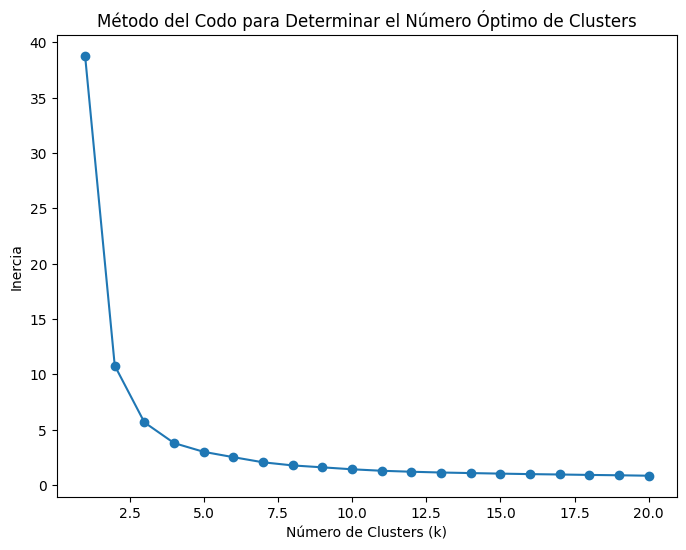

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Creamos una copia del DataFrame original
df_retail_copy1 = df_retail.copy()

# Paso 1: Obtenemos las características LRMFP con FunctionTransformer
feature_extraction = FunctionTransformer(func=custom_features, validate=False)

# Paso 2: Imputamos valores faltantes y los reemplazamos con el promedio
imputer = SimpleImputer(strategy='mean')

# Paso 3: Aplicamos MinMaxScaler a todas las columnas menos la primera
scaler = ColumnTransformer([("scaler", MinMax(),slice(0,None))], remainder="passthrough")

# Guardamos los resultados
results = []

for k in range(1, 21):
    # Paso 4: Aplicar K-Means con diferentes valores de k
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Creamos el pipeline
    pipeline = Pipeline([
        ('features', feature_extraction),
        ('impute', imputer),
        ('scaler', scaler),
        ('kmeans', kmeans)
    ])

    # Aplicamos el pipeline a los datos LRMFP
    pipeline.fit_transform(df_retail_copy1)

    # Guardamos la inercia para este valor de k
    results.append(pipeline.named_steps['kmeans'].inertia_)

# Graficamos la inercia en función de k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), results, marker='o')
plt.title("Método del Codo para Determinar el Número Óptimo de Clusters")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.show()

#### 1.3.3.2 Segmentación de Clientes con K-Means 🎁 [1 punto]

En base a la elección de k realizada en la sección anterior, utilice este valor escogido y entrene un modelo de K-means utilizando el mismo pipeline de scikit-learn utilizado anteriormente.

Una vez ajustado los datos, genere una tabla con los promedios (o medianas) para cada uno de los atributos, agrupando estos por el clúster que pertenecen. ¿Es posible observar agrupaciones coherentes?, ¿Qué tipo de clientes posee el retail?, Justifique su respuesta y no decepcione a Mr. Lepin.


**Respuesta:**

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Creamos una copia del DataFrame original
df_retail_copy2 = df_retail.copy()

# Paso 1: Obtenemos las características LRMFP con FunctionTransformer
feature_extraction = FunctionTransformer(func=custom_features, validate=False)

# Paso 2: Imputamos valores faltantes y los reemplazamos con el promedio
imputer = SimpleImputer(strategy='mean')

# Paso 3: Aplicamos MinMaxScaler a todas las columnas menos la primera
scaler = ColumnTransformer([("scaler", MinMax(),slice(0,None))], remainder="passthrough")

# Paso 4: Aplicar K-Means con diferentes valores de k
kmeans = KMeans(n_clusters=6, random_state=42)

# Creamos el pipeline
pipeline = Pipeline([
    ('features', feature_extraction),
    ('impute', imputer),
    ('scaler', scaler),
    ('kmeans', kmeans)
])

# Aplicamos el pipeline a los datos LRMFP
pipeline.fit_transform(df_retail_copy2)

# Obtenemos las etiquetas de clústeres
labels = pipeline.named_steps['kmeans'].labels_

# Obtenemos Custom features de la copia
df_retail_copy2 = custom_features(df_retail_copy2)

# Aplicamos el imputador a la copia
df_retail_inputer = imputer.fit_transform(df_retail_copy2)

# Convertimos a DataFrame
df_retail_inputer = pd.DataFrame(df_retail_inputer, columns=df_retail_copy2.columns)

# Agregamos las etiquetas de clúster al DataFrame
df_retail_inputer['Cluster'] = labels

# Calculamos los promedios de cada atributo agrupados por los clúster
cluster_means = df_retail_inputer.groupby('Cluster').mean()

cluster_means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Customer ID,Length,Recency,Frequency,Monetary,Periodicity
Cluster,,,,,,
0,13852.074483,145.099310,88.324138,86.324138,37.054784,12.796650
1,15852.440492,134.808482,89.906977,88.569083,39.818960,11.551258
2,16835.555556,135.766526,89.002813,91.935302,24.797380,11.596243
3,14841.332432,132.381081,93.529730,103.725676,28.581075,11.708770
4,17793.110181,129.297071,90.447699,95.502092,36.789582,11.065508
5,12860.660870,125.886957,90.318841,91.333333,55.695983,10.339263


**Respuesta Esperada:**

|         | Length  | Recency   | Frequency | Monetary | Periodicity |       |
|---------|---------|-----------|----------|-------------|-------|-------|
| Cluster |         |           |          |             |       |       |
|    0    |   258.8 |      45.2 |     76.1 |      1107.7 | 107.6 |   449 |
|    1    |    76.1 |     217.6 |     45.5 |       791.7 |  14.1 |   466 |
|    2    |   368.5 |       4.8 |   2715.0 |    226621.6 |   4.2 |     4 |
|    3    |    85.3 |      45.7 |     65.8 |      1047.0 |  10.5 |   987 |
|    4    |   347.2 |      15.9 |   1658.0 |     35829.3 |   8.0 |    25 |
|    5    |   298.0 |      29.8 |    183.8 |      3639.9 |  32.0 |  1188 |

In [ ]:
cluster_means

,Customer ID,Length,Recency,Frequency,Monetary,Periodicity
Cluster,,,,,,
0,13852.074483,145.099310,88.324138,86.324138,37.054784,12.796650
1,15852.440492,134.808482,89.906977,88.569083,39.818960,11.551258
2,16835.555556,135.766526,89.002813,91.935302,24.797380,11.596243
3,14841.332432,132.381081,93.529730,103.725676,28.581075,11.708770
4,17793.110181,129.297071,90.447699,95.502092,36.789582,11.065508
5,12860.660870,125.886957,90.318841,91.333333,55.695983,10.339263


#### Respuesta

¿Es posible observar agrupaciones coherentes?

Efectivamente es coherentes las agrupaciones generadas, en donde existen 6 tipos distintos de clientes los cuales poseen sus propios valores de promedio de Length, Recency, Frequency, Monetary y Perodicity. Dichos valores describen un perfil de cliente para cada uno de los clusters, en donde se responden sus características especificas en la pregunta siguiente. Cabe destacar que el hecho de que los promedios de cada cluster sean diferentes apuntan a que en efecto son distintos clientes, en donde si bien existen pocas variaciones para ciertas características existen una mayor para otras. En general, se concluye que las observaciones son coherentes debido a que cada cluster presenta sus propios valores diferenciados del resto.

¿Qué tipo de clientes posee el retail?

Existen 6 tipos de clientes evidenciados por cada cluster teniendo las siguientes caracteristicas:

- Cliente 1/Cluster 0: Es el tipo de cliente más fiel (mayor valor de length) y el que realiza mas compras (menor Recency). Pareciera no ser el cliente más frecuente respecto al tiempo de observación (menor Frequency) y tiende a gastar un valor intermedio respecto al resto de los clientes (medio Monetary) visitando periódicamente los locales(mayor Periodicity). En general, corresponde al cliente que visita siempre la tienda para comprar artículos ni muy caros ni muy baratos probablemente los artículos de la semana, siendo esto frecuente a lo largo de todo el mes.

- Cliente 2/Cluster 1: Este cliente es bastante similar al anterior, pero posee una menor fidelidad (menor Length), mayor tiempo desde la última compra (mayor Recency) y un menor número de visitas (menor Periodicity). A diferencia del anterior, también presenta una mayor cantidad de apariciones durante el tiempo de observación (mayor frequency) y un mayor gasto monetario (mayor Monetary). Probablemente estos clientes corresponden a los que compran cada dos semanas, comprando una mayor cantidad de productos en el proceso, además justo calzo que sus visitas fueron consideradas en el tiempo de observación lo que explica una mayor cantidad que el cliente anterior.

- Cliente 3/Cluster 2: Para este caso, el cliente presenta un mayor Length,  Periodocity y Frequency que el cliente anterior, lo que significa que es más fiel, visita más veces la tienda y a la vez estuvo más presente en el periodo de observación, pero se diferencia de los dos anteriores en gran medida debido a que posee el menor valor de Monetary lo que implica que gasta menos dinero en promedio. Por lo tanto, este tipo de cliente debe visitar la tienda cada dos semanas para comprar productos baratos, esto último no implica la cantidad.

- Cliente 4/Cluster 3: Este cliente es menos fiel que los anteriores (menor Length) pero visito en mucho mayor medida el local que los clientes anteriores durante el periodo de observación (mayor Frequency). Posee un bajo Monetary (un poco mayor que el anterior) pero presenta el mayor Recency, lo que implica que el cliente compro productos de bajo precio pero no tiene interés en volver a comprar en alguno de los locales. Por lo tanto, este cliente es más casual para los locales tendiendo a comprar productos de bajo precio lo que no influye mucho para la tienda, además resulto ser el más observado durante el periodo de observación y corresponde a uno de los que más visita la tienda (Mayor periodocity) lo que refleja que más visitas no necesariamente corresponde a más compras. Esto último puede corresponder a que el cliente es indeciso o solo busca las mejores ofertas.

- Cliente 5/ Cluster 4: Para este caso, el cliente en cuestión es muy similar al 4 a diferencia de que tiene más interés en comprar en los locales (menor Recency) y tiende a tener un gasto monetario mayor (Mayor Monetary), visita con menor frecuencia la tienda (menor Perodicity respecto a 4). Por lo tanto, es un cliente similar al anterior pero que gasta más en el local y es más propenso a comprar nuevamente sin ser tan casual como el anterior.

- Cliente 6/ Cluster 5: El ultimo cliente es el más característico, siendo el que más gasta (mayor Monetary) y el que menos visita la tienda (menor Periodocity), además resulta ser el menos fiel ( menor Length) e intermediamente uno de los que más tiende a comprar nuevamente ( medio Recency). Este tipo de cliente probablemente corresponde a los que hacen todas las compras del mes en un día, lo cual explicaría el gran gasto del local al igual que la poca periodicidad, también puede ser el tipo de cliente que compra cosas caras de vez en cuando en el local, siendo siempre característico su gran gasto y poco número de visitas.

Por lo tanto, se observa que cada cliente posee sus propias características teniendo distintos perfiles, debido a esto se concluye que la clusterizacion es coherente generando el efecto deseado. De todas las observaciones, se destaca que se pueden generar posibles ofertas para los distintos perfiles de usuarios como por ejemplo descuentos para las personas que compran frecuente en los locales dado que de este modo se puede aprovechar aún mas las ganancias de los clientes 1, o tener otro enfoque como por ejemplo tener más oferta para productos de alto precio o más ofertas para clientes nuevos lo que generaría incentivos para los clientes tipo 6. Todo este tipo de ideas pueden ser desarrolladas con esta información.



#### 1.3.3.3 Plot de K-Means 📈 [0.5 puntos]



Por último, Mr. Lepin, impaciente de no entender lo que usted intenta explicarle, le solicita que por favor muestre algún resultado "visual" de los grupos encontrados.

Para esto, grafique nuevamente las características encontradas usando `T-SNE` (no calcule de nuevo, simplemente utilice las proyecciones encontradas) y agregue las labels calculadas con kmeans como el argumento `color`.   

Comente: ¿Se separan bien los distintos clusters en la visualización?


**Respuesta:**

In [ ]:
import plotly.express as px

# Agregamos las etiquetas de clúster como columna a df_retail_reduce
df_retail_reduce['Cluster'] = labels

# Creamos el gráfico de dispersión con colores basados en los clúster
fig = px.scatter(
    df_retail_reduce, x="Component 1", y="Component 2",
    color="Cluster",
    title="Gráfico de Dispersión de Componentes Reducidas (T-SNE) con Clústeres",
    labels={'Component 1': 'TSNE Component 1', 'Component 2': 'TSNE Component 2'},
    width=800, height=600
)

fig.show()

#### Respuesta

¿Se separan bien los distintos clusters en la visualización?

Se separan bien los clusters notándose claramente la presencia de 6 distintos. Aun así, existe algunos puntos que a priori parecieran tener problemas de agrupación, específicamente los correspondientes al cluster morado los cuales se tienden a juntar con los rosados, existiendo una gran distancia entre el cluster original y dicho subgrupo. Dichos cluster corresponden al 1 y 2, los cuales en efecto corresponden a perfiles de usuarios parecidos pero diferenciados en gran medida en las variables Frequency y Monetary, dada la similitud de dichos perfiles es normal que esten tan juntos ademas debido a que el cluster 1 se divide en dos subgrupos es posible inferir que existen dos perfiles de clientes tipo 2, siendo uno de los subgrupos muy parecido al cluster 2. Esto último se podría considerar un error pero debido a que solo corresponde a un subgrupo del cluster 1 (menor que la mitad de los puntos) no vale la penas caracterizar dicho usuario dado que corresponde a uno muy similar al tipo 2.

Por lo tanto, se concluye que los cluster se separaron bien y que en efecto los perfiles de usuarios se relacionan con el grafico de dispersión de los puntos. Además, se justifica que a pesar de que existen agrupaciones extrañas estas tienen sentido referido al problema, siendo una proporción pequeña estos eventos.

(El hecho de que exista un subgrupo también se relaciona con el resultado del método del codo, en donde seis y siete clusters son puntos muy cercanos lo cual generaría resultados similares, aun así, se destaca que dicho subgrupo no vale la pena clasificarlo como un cluster debido a que son muy similares con el cluster completo y posee muy pocos puntos en relación al total, teniendo una buena clasificación solo con seis).

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por correo, Discord o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

Los clusters ak los stardust crusaders

![Gracias Totales!](https://images.uncyc.org/pt/thumb/5/55/Jojo_cerveja.gif/300px-Jojo_cerveja.gif )





<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>